In [1]:
from sklearn.datasets import make_classification

Scikit-learn nous fournit un écosystème d'apprentissage automatique qui vous permet de générer l'ensemble de données et d'évaluer divers algorithmes d'apprentissage automatique. 

Dans notre cas, nous créons un jeu de données avec six caractéristiques, trois classes et 800 échantillons en utilisant la fonction `make_classification`.

In [8]:
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

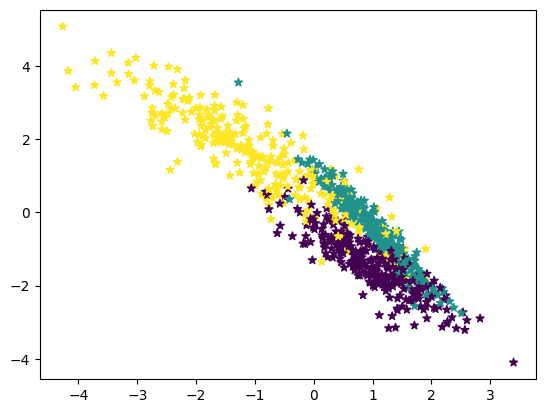

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

Avant de commencer le processus d'apprentissage, nous devons diviser l'ensemble de données en deux parties, l'une pour l'apprentissage et l'autre pour le test, afin d'évaluer le modèle. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

Construisez un Naive Bayes gaussien générique et entraînez-le sur un ensemble de données d'entraînement. Ensuite, introduisez un échantillon de test aléatoire dans le modèle pour obtenir une valeur prédite.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

# Les valeurs réelles et prédites sont identiques :

Actual Value: 0
Predicted Value: 0


Évaluation du modèle : 

Nous ne ferons pas évoluer le modèle sur un ensemble de données de test inédit. Tout d'abord, nous allons prédire les valeurs de l'ensemble de données de test et les utiliser pour calculer la précision et le score F1. 

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

# Notre modèle a donné d'assez bons résultats avec les hyperparamètres par défaut :

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


Pour visualiser la matrice de confusion, nous utiliserons `confusion_matrix` pour calculer les vrais positifs et les vrais négatifs et `ConfusionMatrixDisplay` pour afficher la matrice de confusion avec les étiquettes.

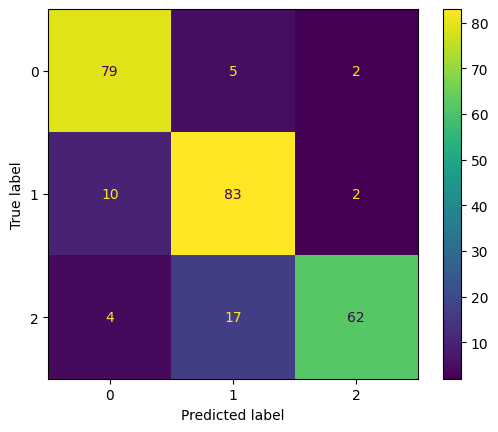

In [13]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();